## 8일차 K 최근접 이웃
### k(이웃 수)가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그림으로 나타내고 최적의 이웃 수를 산출하라. 
### 데이터 : 유방암 데이터(변수: 31개, 자료 수: 569개)
### -목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개) 

In [6]:
import os
import pandas as pd
import numpy as np
# KNN 패키지
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# 파일명만 적을 수 있도록
from os import chdir
chdir("/home/pirl/test/과제파일")
os.getcwd()
bcancer = pd.read_csv("유방암.csv",engine = "python")
bcancer.isnull().sum() # 결측치 없음
bcancer.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
x = bcancer.drop("diagnosis", axis = 1, inplace = False)
y = bcancer["diagnosis"]
bcancer_train_x, bcancer_test_x, bcancer_train_y, bcancer_test_y = train_test_split(x, y, test_size=0.3, random_state=1234)

## Step 2. 모델생성 - default parameter

In [12]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(bcancer_train_x,bcancer_train_y)
# test 데이터로예측
y_pred = knn_uncustomized.predict(bcancer_test_x)
print("predict test set: {}".format(y_pred.tolist()[:10]))
print("test set label: {}".format(bcancer_test_y.tolist()[:10]))
print("accuracy: {0:.3f}".format(knn_uncustomized.score(bcancer_test_x,bcancer_test_y)))

predict test set: [0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
test set label: [0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
accuracy: 0.936


## - 이웃 수 증가에 따른 정확도 변화

In [14]:
# 최대 이웃 수
max_n_neighbors = 28 # 반복 수행할 리스트(3~30)
para_n_neighbors = [i+3 for i in range(max_n_neighbors)]
train_accuracy = []
test_accuracy = []
# 반복문
for n_neighbors in para_n_neighbors:
    # 이웃 3~30개까지 지정하여 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(bcancer_train_x,bcancer_train_y)
    # train data 정확도
    train_accuracy.append(clf.score(bcancer_train_x,bcancer_train_y))
    # test data 정확도
    test_accuracy.append(clf.score(bcancer_test_x,bcancer_test_y))
# DataFrame 변환
ds_neighbors = pd.DataFrame()
ds_neighbors["Neighbors"]= para_n_neighbors
ds_neighbors["TrainAccuracy"] = train_accuracy
ds_neighbors["TestAccuracy"] = test_accuracy
ds_neighbors

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.952261,0.929825
1,4,0.947236,0.918129
2,5,0.944724,0.935673
3,6,0.942211,0.923977
4,7,0.937186,0.941520
5,8,0.939698,0.935673
6,9,0.939698,0.929825
7,10,0.934673,0.923977
8,11,0.939698,0.935673
9,12,0.934673,0.923977


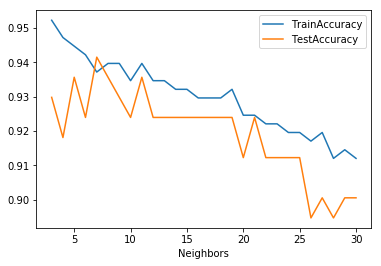

In [15]:
ds_neighbors.set_index("Neighbors", inplace = False).plot()

## - 가중치별 이웃 수 증가에 따른 정확도 변화

In [16]:
max_n_neighbors = 28 
para_n_neighbors = [i+3 for i in range(max_n_neighbors)]*2
# 가중치(uniform, distance)
para_weights = ["uniform"]*max_n_neighbors+["distance"]*max_n_neighbors
# 트레인 및 테스트 정확도 결과 저장용
train_accuracy = []; test_accuracy = [];
# zip(list1,list2,...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neighbors[1], weights = para_weights[1]
for (n_neighbors, weights) in zip(para_n_neighbors, para_weights):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights)
    clf.fit(bcancer_train_x,bcancer_train_y)
    train_accuracy.append(clf.score(bcancer_train_x,bcancer_train_y))
    test_accuracy.append(clf.score(bcancer_test_x,bcancer_test_y))
# DataFrame 변환
ds_neighbors_weight = pd.DataFrame()
ds_neighbors_weight["Neighbors"] = para_n_neighbors
ds_neighbors_weight["Weights"] = para_weights
ds_neighbors_weight["TrainAccuracy"] = train_accuracy
ds_neighbors_weight["TestAccuracy"] = test_accuracy
ds_neighbors_weight

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,3,uniform,0.952261,0.929825
1,4,uniform,0.947236,0.918129
2,5,uniform,0.944724,0.935673
3,6,uniform,0.942211,0.923977
4,7,uniform,0.937186,0.941520
5,8,uniform,0.939698,0.935673
6,9,uniform,0.939698,0.929825
7,10,uniform,0.934673,0.923977
8,11,uniform,0.939698,0.935673
9,12,uniform,0.934673,0.923977


In [17]:
# melt method: 데이터를 재구성하는 함수로 id_vars를 기준으로 Transpose
ds_neighbors_weight_melt = pd.melt(ds_neighbors_weight, id_vars=["Neighbors","Weights"])
# variable 열에는 ds_neighbors_weight데이터의 id_vars를 제외한 column 명이 있음
# Weights 값들과 concat하여 새로운 범주 변수명 생성
ds_neighbors_weight_melt["Accuracy"] = ds_neighbors_weight_melt["Weights"] + "_"+ ds_neighbors_weight_melt["variable"]
ds_neighbors_weight_melt

,Neighbors,Weights,variable,value,Accuracy
0,3,uniform,TrainAccuracy,0.952261,uniform_TrainAccuracy
1,4,uniform,TrainAccuracy,0.947236,uniform_TrainAccuracy
2,5,uniform,TrainAccuracy,0.944724,uniform_TrainAccuracy
3,6,uniform,TrainAccuracy,0.942211,uniform_TrainAccuracy
4,7,uniform,TrainAccuracy,0.937186,uniform_TrainAccuracy
5,8,uniform,TrainAccuracy,0.939698,uniform_TrainAccuracy
6,9,uniform,TrainAccuracy,0.939698,uniform_TrainAccuracy
7,10,uniform,TrainAccuracy,0.934673,uniform_TrainAccuracy
8,11,uniform,TrainAccuracy,0.939698,uniform_TrainAccuracy
9,12,uniform,TrainAccuracy,0.934673,uniform_TrainAccuracy


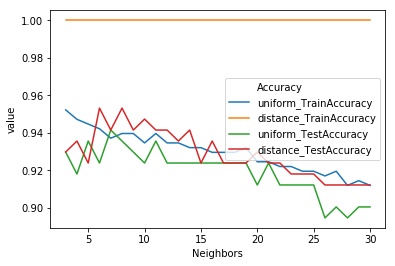

In [18]:
sns.lineplot(x="Neighbors", y="value", hue="Accuracy",data=ds_neighbors_weight_melt)

In [19]:
max_n_neighbors = 28 
para_n_neighbors = [i+3 for i in range(max_n_neighbors)]*3
# 알고리즘(ball_tree, kd_tree, brute)
para_algorithm = ["ball_tree"]*max_n_neighbors+["kd_tree"]*max_n_neighbors+["brute"]*max_n_neighbors
# 트레인 및 테스트 정확도 결과 저장용
train_accuracy = []; test_accuracy = [];
# zip(list1,list2,...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neighbors[1], weights = para_weights[1]
for (n_neighbors, algorithm) in zip(para_n_neighbors, para_algorithm):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors, weights = "uniform", algorithm = algorithm)
    clf.fit(bcancer_train_x,bcancer_train_y)
    train_accuracy.append(clf.score(bcancer_train_x,bcancer_train_y))
    test_accuracy.append(clf.score(bcancer_test_x,bcancer_test_y))
# DataFrame 변환
ds_neighbors_algorithm = pd.DataFrame()
ds_neighbors_algorithm["Neighbors"] = para_n_neighbors
ds_neighbors_algorithm["Algorithm"] = para_algorithm
ds_neighbors_algorithm["TrainAccuracy"] = train_accuracy
ds_neighbors_algorithm["TestAccuracy"] = test_accuracy
ds_neighbors_algorithm

,Neighbors,Algorithm,TrainAccuracy,TestAccuracy
0,3,ball_tree,0.952261,0.929825
1,4,ball_tree,0.947236,0.918129
2,5,ball_tree,0.944724,0.935673
3,6,ball_tree,0.942211,0.923977
4,7,ball_tree,0.937186,0.941520
5,8,ball_tree,0.939698,0.935673
6,9,ball_tree,0.939698,0.929825
7,10,ball_tree,0.934673,0.923977
8,11,ball_tree,0.939698,0.935673
9,12,ball_tree,0.934673,0.923977


In [20]:
# melt method: 데이터를 재구성하는 함수로 id_vars를 기준으로 transpose
ds_neighbors_algorithm_melt = pd.melt(ds_neighbors_algorithm, id_vars=["Neighbors","Algorithm"])
# variable 열에는 ds_neighbors_algorithm데이터의 id_vars를 제외한 column 명이 있음
# Algorithm 값들과 concat하여 새로운 범주 변수명 생성
ds_neighbors_algorithm_melt["Accuracy"] = ds_neighbors_algorithm_melt["Algorithm"] + "_"+ ds_neighbors_algorithm_melt["variable"]
ds_neighbors_algorithm_melt

,Neighbors,Algorithm,variable,value,Accuracy
0,3,ball_tree,TrainAccuracy,0.952261,ball_tree_TrainAccuracy
1,4,ball_tree,TrainAccuracy,0.947236,ball_tree_TrainAccuracy
2,5,ball_tree,TrainAccuracy,0.944724,ball_tree_TrainAccuracy
3,6,ball_tree,TrainAccuracy,0.942211,ball_tree_TrainAccuracy
4,7,ball_tree,TrainAccuracy,0.937186,ball_tree_TrainAccuracy
5,8,ball_tree,TrainAccuracy,0.939698,ball_tree_TrainAccuracy
6,9,ball_tree,TrainAccuracy,0.939698,ball_tree_TrainAccuracy
7,10,ball_tree,TrainAccuracy,0.934673,ball_tree_TrainAccuracy
8,11,ball_tree,TrainAccuracy,0.939698,ball_tree_TrainAccuracy
9,12,ball_tree,TrainAccuracy,0.934673,ball_tree_TrainAccuracy


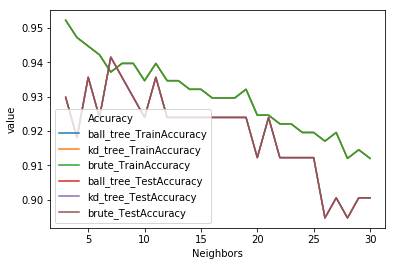

In [21]:
sns.lineplot(x="Neighbors", y="value", hue="Accuracy",data=ds_neighbors_algorithm_melt)

In [22]:
max_n_neighbors = 28 
para_n_neighbors = [i+3 for i in range(max_n_neighbors)]*3
# 거리 계산 방법(minkowski, euclidean, manhattan)
para_metric = ["minkowski"]*max_n_neighbors+["euclidean"]*max_n_neighbors+["manhattan"]*max_n_neighbors
# 트레인 및 테스트 정확도 결과 저장용
train_accuracy = []; test_accuracy = [];

for (n_neighbors, metric) in zip(para_n_neighbors, para_metric):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors, weights = "uniform", algorithm = "ball_tree", metric=metric)
    clf.fit(bcancer_train_x,bcancer_train_y)
    train_accuracy.append(clf.score(bcancer_train_x,bcancer_train_y))
    test_accuracy.append(clf.score(bcancer_test_x,bcancer_test_y))
# DataFrame 변환
ds_neighbors_metric = pd.DataFrame()
ds_neighbors_metric["Neighbors"] = para_n_neighbors
ds_neighbors_metric["Metric"] = para_metric
ds_neighbors_metric["TrainAccuracy"] = train_accuracy
ds_neighbors_metric["TestAccuracy"] = test_accuracy
ds_neighbors_metric

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,3,minkowski,0.952261,0.929825
1,4,minkowski,0.947236,0.918129
2,5,minkowski,0.944724,0.935673
3,6,minkowski,0.942211,0.923977
4,7,minkowski,0.937186,0.941520
5,8,minkowski,0.939698,0.935673
6,9,minkowski,0.939698,0.929825
7,10,minkowski,0.934673,0.923977
8,11,minkowski,0.939698,0.935673
9,12,minkowski,0.934673,0.923977


In [23]:
# melt method: 데이터를 재구성하는 함수로 id_vars를 기준으로 transpose
ds_neighbors_metric_melt = pd.melt(ds_neighbors_metric, id_vars=["Neighbors","Metric"])
# variable 열에는 ds_neighbors_algorithm데이터의 id_vars를 제외한 column 명이 있음
# Algorithm 값들과 concat하여 새로운 범주 변수명 생성
ds_neighbors_metric_melt["Accuracy"] = ds_neighbors_metric_melt["Metric"] + "_"+ ds_neighbors_metric_melt["variable"]
ds_neighbors_metric_melt

,Neighbors,Metric,variable,value,Accuracy
0,3,minkowski,TrainAccuracy,0.952261,minkowski_TrainAccuracy
1,4,minkowski,TrainAccuracy,0.947236,minkowski_TrainAccuracy
2,5,minkowski,TrainAccuracy,0.944724,minkowski_TrainAccuracy
3,6,minkowski,TrainAccuracy,0.942211,minkowski_TrainAccuracy
4,7,minkowski,TrainAccuracy,0.937186,minkowski_TrainAccuracy
5,8,minkowski,TrainAccuracy,0.939698,minkowski_TrainAccuracy
6,9,minkowski,TrainAccuracy,0.939698,minkowski_TrainAccuracy
7,10,minkowski,TrainAccuracy,0.934673,minkowski_TrainAccuracy
8,11,minkowski,TrainAccuracy,0.939698,minkowski_TrainAccuracy
9,12,minkowski,TrainAccuracy,0.934673,minkowski_TrainAccuracy


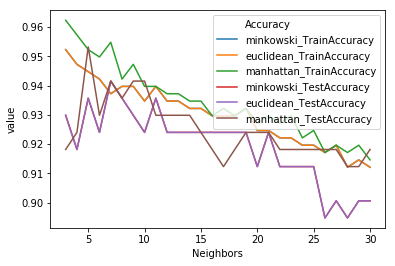

In [24]:
sns.lineplot(x="Neighbors", y="value", hue="Accuracy",data=ds_neighbors_metric_melt)

In [26]:
clf_model = KNeighborsClassifier(n_neighbors=4, weights = "uniform", algorithm = "ball_tree", metric = "euclidean")
clf_model.fit(bcancer_train_x,bcancer_train_y)
# 훈련 데이터 셋 정확도
print("train data accuracy: {0:.3f}".format(clf_model.score(bcancer_train_x,bcancer_train_y)))
# 테스트 데이터 셋 정확도
print("test data accuracy: {0:.3f}".format(clf_model.score(bcancer_test_x,bcancer_test_y)))

train data accuracy: 0.947
test data accuracy: 0.918
